# k-NN algorithm 
---
Application on the datasets with features:
1. TF-IDF per character
2. ascii
3. statistics

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
# Extract features (X) and target variable (y) from the files
train_TFIDF = pd.read_csv("train_tfidf.csv")
X_train_TFIDF , y_train_TFIDF = (train_TFIDF.drop(['Strength'], axis=1), train_TFIDF['Strength'])

test_TFIDF = pd.read_csv('test_tfidf.csv')
X_test_TFIDF , y_test_TFIDF = (test_TFIDF.drop(['Strength'], axis=1) , test_TFIDF['Strength'])

In [3]:
# Extract features (X) and target variable (y) from the files
train_CHAR = pd.read_csv("train_data_char.csv")
train_CHAR.dropna(inplace=True)
X_train_CHAR , y_train_CHAR = (train_CHAR.drop(['Strength'], axis=1), train_CHAR['Strength'])

test_CHAR = pd.read_csv('test_data_char.csv')
test_CHAR.dropna(inplace=True)
X_test_CHAR , y_test_CHAR = (test_CHAR.drop(['Strength'], axis=1) , test_CHAR['Strength'])

da internet: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

**check if we have to scale (normalize) our dataset**

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

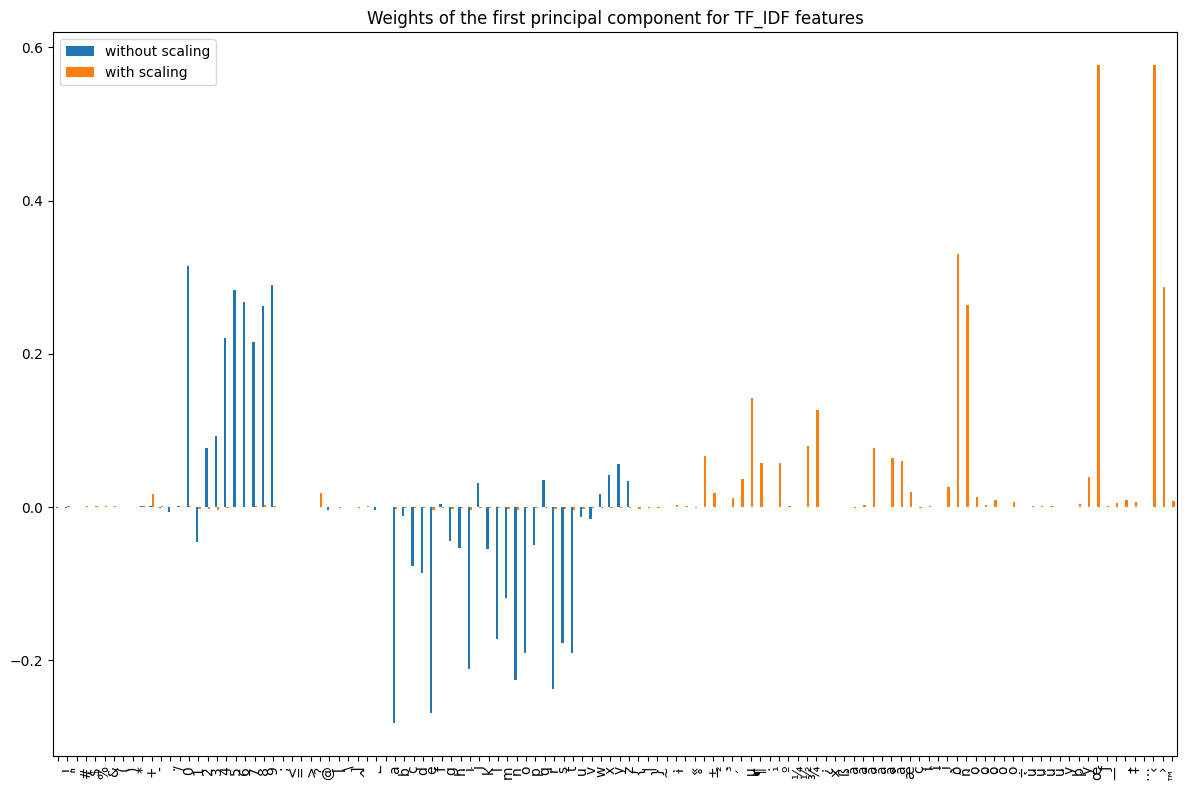

In [25]:
scaler = StandardScaler().set_output(transform="pandas")
scaled_X_train = scaler.fit_transform(X_train_TFIDF)
pca = PCA(n_components=2).fit(X_train_TFIDF)
scaled_pca = PCA(n_components=2).fit(scaled_X_train)
X_train_transformed = pca.transform(X_train_TFIDF)
X_train_std_transformed = scaled_pca.transform(scaled_X_train)

first_pca_component = pd.DataFrame(
    pca.components_[0], index=X_train_TFIDF.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component for TF_IDF features", figsize=(12, 8)
)

_ = plt.tight_layout()

as shown above, the scaling in this case, do not perform better, since the features were similar in order of magnitude before the standardization.

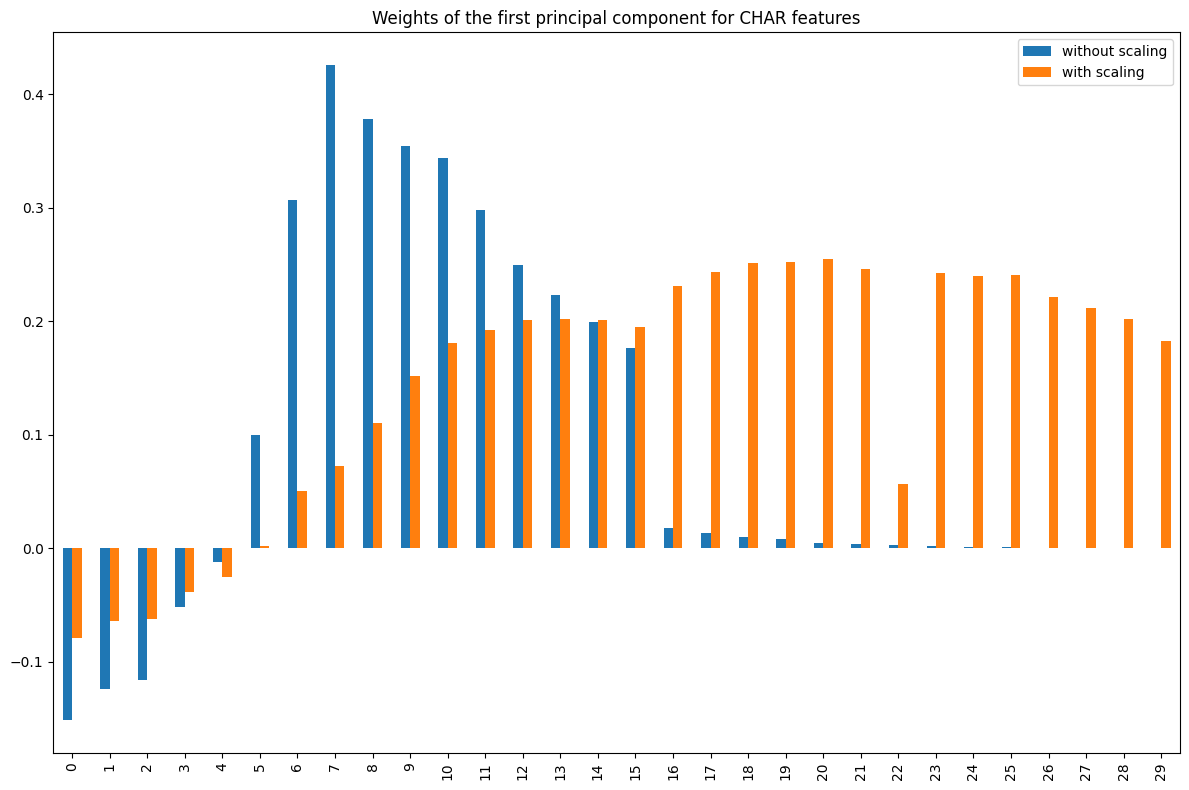

In [7]:
scaler = StandardScaler().set_output(transform="pandas")
scaled_X_train_char = scaler.fit_transform(X_train_CHAR)
pca = PCA(n_components=2).fit(X_train_CHAR)
scaled_pca = PCA(n_components=2).fit(scaled_X_train_char)
X_train_transformed = pca.transform(X_train_CHAR)
X_train_std_transformed = scaled_pca.transform(scaled_X_train_char)

first_pca_component = pd.DataFrame(
    pca.components_[0], index=X_train_CHAR.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component for CHAR features", figsize=(12, 8)
)

_ = plt.tight_layout()

for CHAR features maybe it's better to scale them

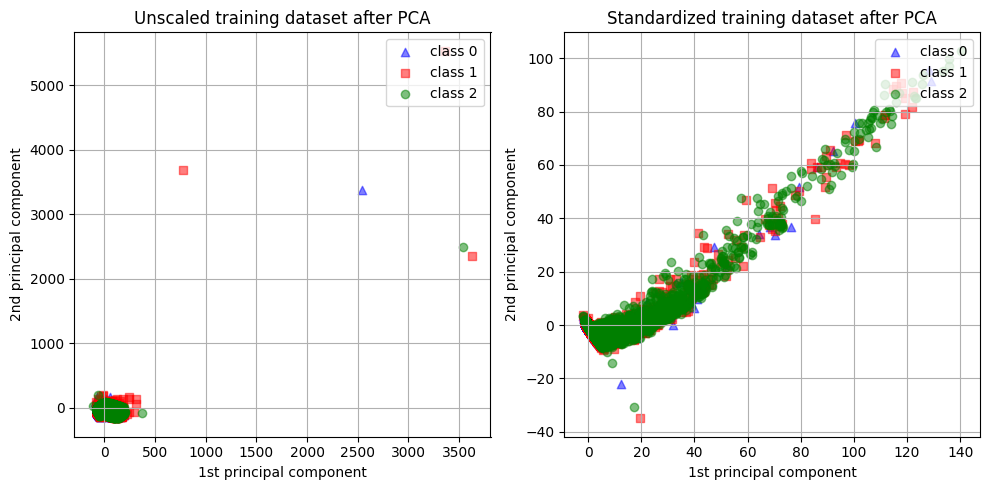

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train_CHAR == target_class, 0],
        y=X_train_transformed[y_train_CHAR == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_transformed[y_train_CHAR == target_class, 0],
        y=X_train_std_transformed[y_train_CHAR == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Unscaled training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

_ = plt.tight_layout()

yes, maybe it's better to normalize them

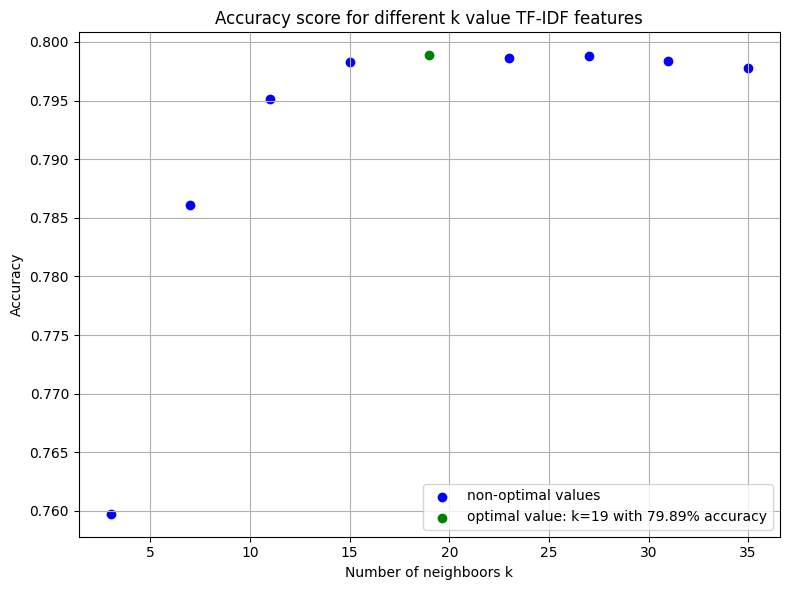

In [4]:
# apply the kNN to the dataset with the TF-IDF features

# trying to understand which hyperparameter is the best
scores_tf_idf = {}
for n_n in range(3, 36, 4):    
    # instantiate the model: the k-NN classifier
    model_knn = KNeighborsClassifier(n_neighbors=n_n)

    # fit the model to our data
    model_knn.fit(X_train_TFIDF, y_train_TFIDF)

    # predict on new data
    y_model = model_knn.predict(X_test_TFIDF)

    scores_tf_idf[n_n] = accuracy_score(y_test_TFIDF, y_model)

# plot the scores and the accuracy 
keys = list(scores_tf_idf.keys())
values = list(scores_tf_idf.values())

# Find maximum value of accuracy and its corresponding k
max_value = max(values)
max_key = keys[values.index(max_value)]

# Plotting the trend of the accuracy for different values of k
plt.figure(figsize=(8,6))
plt.scatter([key for key in keys if key != max_key], [val for val in values if val != max_value], color='blue', label='non-optimal values')
plt.scatter(max_key, max_value, color='green', label=f'optimal value: k={max_key} with {(max_value*100).round(2)}% accuracy')
plt.legend()
plt.xlabel('Number of neighboors k')
plt.ylabel('Accuracy')
plt.title('Accuracy score for different k value TF-IDF features')
plt.grid(True)
plt.tight_layout()
plt.show()

Text(77.92222222222227, 0.5, 'true value')

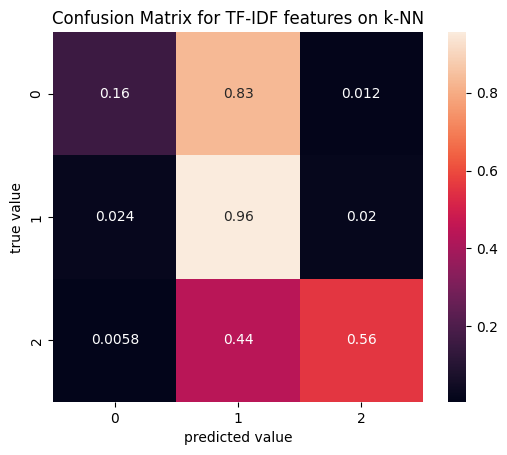

In [5]:
n_n = max_key

# instantiate the model: the k-NN classifier
model_knn = KNeighborsClassifier(n_neighbors=n_n)

# fit the model to our data
model_knn.fit(X_train_TFIDF, y_train_TFIDF)

# predict on new data
y_model_TFIDF = model_knn.predict(X_test_TFIDF)

# Evaluating the model
accuracy_score(y_test_TFIDF, y_model_TFIDF)
mat = confusion_matrix(y_test_TFIDF, y_model_TFIDF)
# normalized confusion matrix
normalized_mat = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]

sns.heatmap(normalized_mat, square=True, annot=True, cbar=True)
plt.title('Confusion Matrix for TF-IDF features on k-NN')
plt.xlabel('predicted value')
plt.ylabel('true value')

In [6]:
# Display classification report
print("Classification Report for TF-IDF features on k-NN:")
print(classification_report(y_test_TFIDF, y_model_TFIDF))

Classification Report for TF-IDF features on k-NN:
              precision    recall  f1-score   support

           0       0.53      0.16      0.24     17868
           1       0.81      0.96      0.88     99331
           2       0.81      0.56      0.66     16770

    accuracy                           0.80    133969
   macro avg       0.72      0.56      0.59    133969
weighted avg       0.77      0.80      0.76    133969



char data

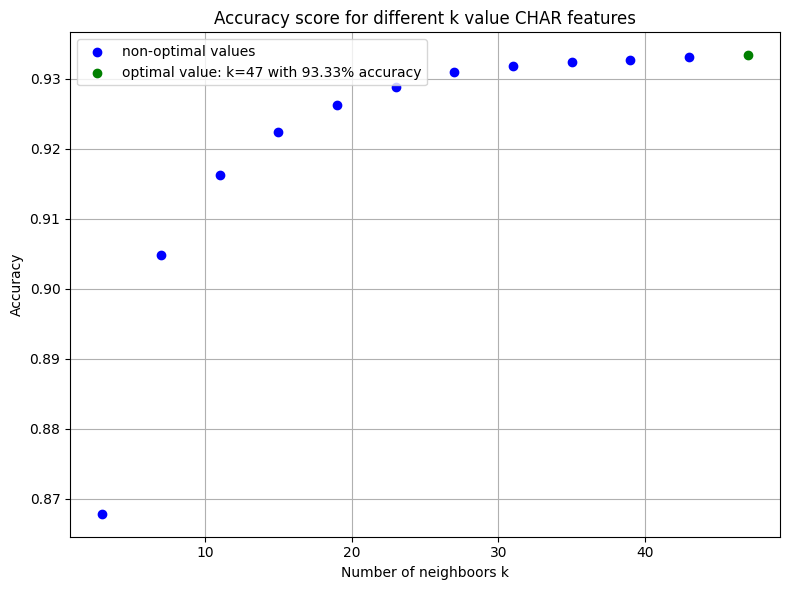

In [16]:
scaled_X_train_char = scaler.fit_transform(X_train_CHAR) # scale the dataset
scaled_X_test_char = scaler.fit_transform(X_test_CHAR)

# apply the kNN to the dataset with the CHAR features

# trying to understand which hyperparameter is the best
scores_char = {}
for n_n in range(3, 50, 4):    
    # instantiate the model: the k-NN classifier
    model_knn = KNeighborsClassifier(n_neighbors=n_n)

    # fit the model to our data
    model_knn.fit(scaled_X_train_char, y_train_CHAR)

    # predict on new data
    y_model = model_knn.predict(scaled_X_test_char)

    scores_char[n_n] = accuracy_score(y_test_CHAR, y_model)
    
# plot the scores and the accuracy 
keys = list(scores_char.keys())
values = list(scores_char.values())

# Find maximum value of accuracy and its corresponding k
max_value = max(values)
max_key = keys[values.index(max_value)]

# Plotting the trend of the accuracy for different values of k
plt.figure(figsize=(8,6))
plt.scatter([key for key in keys if key != max_key], [val for val in values if val != max_value], color='blue', label='non-optimal values')
plt.scatter(max_key, max_value, color='green', label=f'optimal value: k={max_key} with {(max_value*100).round(2)}% accuracy')
plt.legend()
plt.xlabel('Number of neighboors k')
plt.ylabel('Accuracy')
plt.title('Accuracy score for different k value CHAR features')
plt.grid(True)
plt.tight_layout()
plt.show()

Text(77.92222222222227, 0.5, 'true value')

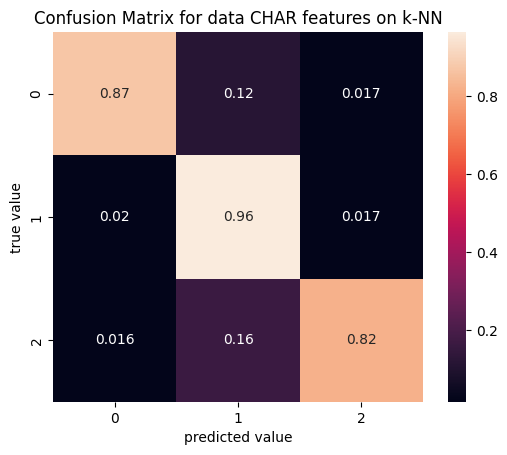

In [7]:
#n_n = max_key
n_n = 47
# instantiate the model: the k-NN classifier
model_knn = KNeighborsClassifier(n_neighbors=n_n)

# fit the model to our data
model_knn.fit(X_train_CHAR, y_train_CHAR)

# predict on new data
y_model_char = model_knn.predict(X_test_CHAR)

# Evaluating the model
accuracy_score(y_test_CHAR, y_model_char)
mat = confusion_matrix(y_test_CHAR, y_model_char)
# normalized confusion matrix
normalized_mat = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]

sns.heatmap(normalized_mat, square=True, annot=True, cbar=True)
plt.title('Confusion Matrix for data CHAR features on k-NN')
plt.xlabel('predicted value')
plt.ylabel('true value')

In [8]:
# Display classification report
print("Classification Report for data CHAR features on k-NN:")
print(classification_report(y_test_CHAR, y_model_char))

Classification Report for data CHAR features on k-NN:
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87     11486
         1.0       0.95      0.96      0.96     63417
         2.0       0.87      0.82      0.85     10711

    accuracy                           0.93     85614
   macro avg       0.90      0.88      0.89     85614
weighted avg       0.93      0.93      0.93     85614

